In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Ler o arquivo CSV com as colunas na primeira linha
df = pd.read_csv('../data/diabetes_prediction_weka.csv')

In [18]:
# 2. Converta todos os atributos não numéricos em numéricos
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [19]:
# 3. Separe as entradas (X) e a classe (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
# 4. Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# 5. Treine a SVM
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [22]:
# 6. Faça as previsões
y_pred = clf.predict(X_test)

# 7. Imprima a acurácia e a matriz de confusão
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.898452380952381
Matriz de Confusão:
 [[24642  2641]
 [ 2477 20640]]


Gerando Matriz de Confusão

In [23]:
cm = confusion_matrix(y_test, y_pred)

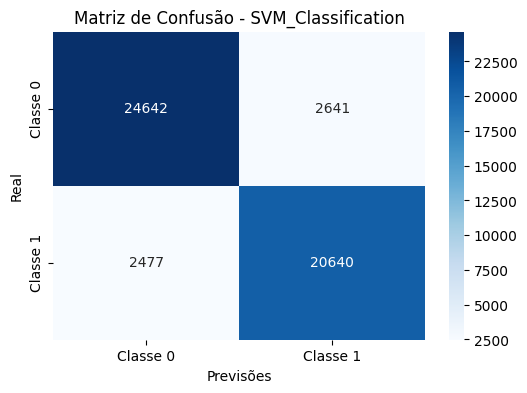

In [24]:
# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão - SVM_Classification')
plt.show()

Gerando e calculando o Índice Kappa

In [25]:
# Calcular o índice kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Índice Kappa:", kappa)

Índice Kappa: 0.7956182754364794
